# 1. Camera Calibration

This script intends to calibrate a camera using an object.
For this implementation we will use the DLT transform for the estimation of the camera parameters

**Import the libraries**

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
#matplotlib widget

## Direct Linear Transform
Estimates the 11 parameters of the uncalibrated camera(5 from th)

**Implementation:**

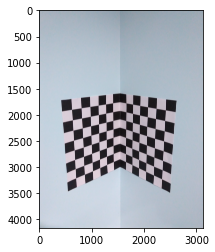

In [2]:
#Import the image
img = cv2.imread("images/calib_object.jpg")
# convert it to gray scale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

In [3]:
worldcoo = np.array([ (0,0,0), (0,28,0), (56,0,0), (56,28,0), (56,84,0), (84,84,0), (112,56,0),
             (112,84,0), (84,56,0), (84,112,0), (0,28,28), (0,28,56), (0,56,28), (0,56,56), 
             (0,56,84), (0,56,112), (0,112,0), (0,112,28), (0,112,56), (0,112,84), (0,112,112) 
           ])

imagecoo = np.array([ (1549, 1599), (1547, 1763), (1797, 1625), (1793, 1807), (1785, 2156), (1918, 2196),
             (2069, 2051), (2061, 2233), (1928, 2015), (1915, 2366), (1413, 1781), (1280, 1807),
             (1415, 1958), (1283, 1981), (1139, 2013), (990, 2041), (1541, 2251), (1420, 2287),
             (1292, 2320), (1149, 2356), (1005, 2401)
           ])


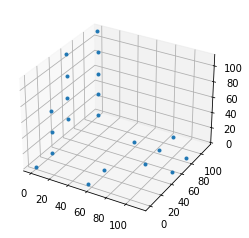

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = "3d")
#ax.plot(0,0)
ax.plot(worldcoo[:,0],worldcoo[:,1],worldcoo[:,2], ls = "None", marker = ".")
plt.show()

### Homogenous coordinates transformation

In [5]:
# get the shape of the matrix
worldm, worldn = worldcoo.shape
imagem, imagen = imagecoo.shape

In [6]:
homo_world = np.append(worldcoo,np.ones((worldm,1)),axis = 1)

In [7]:
homo_image = np.append(imagecoo,np.ones((imagem,1)),axis = 1)

In [8]:
homo_world

array([[  0.,   0.,   0.,   1.],
       [  0.,  28.,   0.,   1.],
       [ 56.,   0.,   0.,   1.],
       [ 56.,  28.,   0.,   1.],
       [ 56.,  84.,   0.,   1.],
       [ 84.,  84.,   0.,   1.],
       [112.,  56.,   0.,   1.],
       [112.,  84.,   0.,   1.],
       [ 84.,  56.,   0.,   1.],
       [ 84., 112.,   0.,   1.],
       [  0.,  28.,  28.,   1.],
       [  0.,  28.,  56.,   1.],
       [  0.,  56.,  28.,   1.],
       [  0.,  56.,  56.,   1.],
       [  0.,  56.,  84.,   1.],
       [  0.,  56., 112.,   1.],
       [  0., 112.,   0.,   1.],
       [  0., 112.,  28.,   1.],
       [  0., 112.,  56.,   1.],
       [  0., 112.,  84.,   1.],
       [  0., 112., 112.,   1.]])

In [9]:
#3D DLT
A = []

for i in range(worldm):
    A = np.append(A,[-homo_world[i,0],-homo_world[i,1],-homo_world[i,2],-homo_world[i,3],0,0,0,0,homo_image[i,0]*homo_world[i,0],homo_image[i,0]*homo_world[i,1],homo_image[i,0]*homo_world[i,2],homo_image[i,0]])
    A = np.append(A,[0,0,0,0,-homo_world[i,0],-homo_world[i,1],-homo_world[i,2],-homo_world[i,3],homo_image[i,1]*homo_world[i,0],homo_image[i,1]*homo_world[i,1],homo_image[i,1]*homo_world[i,2],homo_image[i,1]])

#A = np.append(Ax,Ay,axis = 0)

In [10]:
A.shape

(504,)

### SVD(Singular Value Decomposition)
Solving a system of linear equations of the form Ax = 0 is equivalent to finding the null space of A. Thus, we can apply the SVD to solve Mp = 0 

In [11]:
# pass the list A as an array
A = np.asarray(A).reshape(21*2,12)
#print(A)
print(A.shape)

(42, 12)


In [12]:
# SVD 
U, S, Vh = np.linalg.svd(A)

In [13]:
# normalize the V12 value
L = Vh[-1,:] / Vh[-1,-1]
print(Vh)
#Camera projection matrix:
PEst = L.reshape(3,3+1)
print(PEst)

#Mean error of the DLT (mean residual of the DLT transformation in units of camera coordinates):
#uv2 = np.dot( H, np.concatenate( (w.T, np.ones((1,xyz.shape[0]))) ) ) 
#uv2 = uv2/uv2[2,:] 
#mean distance:
#err = np.sqrt( np.mean(np.sum( (uv2[0:2,:].T - uv)**2,1 )) ) 


[[-1.00937630e-04 -1.72974528e-04 -5.52277752e-05 -2.14513339e-06
  -1.11126083e-04 -2.53077038e-04 -1.06881905e-04 -2.99701932e-06
   4.38788515e-01  8.46346054e-01  3.01765063e-01  1.00355584e-02]
 [-1.78021462e-04  4.73872629e-06  1.17681947e-04 -3.16407020e-07
  -1.90167280e-04  1.10102443e-04  2.29116453e-04  9.13822633e-07
   7.53510110e-01 -1.63620763e-01 -6.36749975e-01 -2.86815481e-04]
 [ 1.32397185e-04 -1.01934002e-04  1.38165991e-04  1.09174163e-06
   1.21177884e-04 -1.27951801e-04  2.77280069e-04  1.42430784e-06
  -4.89542539e-01  5.06834340e-01 -7.09545118e-01 -3.55326509e-03]
 [-1.51216272e-03 -2.73933496e-03 -2.01068030e-03 -3.09860710e-04
  -6.36537335e-04 -9.17894989e-04 -9.94719949e-05 -3.27805630e-04
  -5.92770126e-03 -6.74069261e-03 -5.73293464e-03  9.99935630e-01]
 [ 2.62360670e-01  7.07907342e-01  3.47392468e-01  8.47204614e-03
  -2.39002015e-01 -4.69049973e-01 -1.79194000e-01 -5.87463875e-03
   2.07181239e-05 -1.73296191e-05 -5.02212930e-05  2.43449965e-03]
 [ 5.

In [14]:
xEst = np.zeros((worldm,3))
for j in range(worldm):
    xEst[j,:]  = np.dot(PEst,homo_world[j])
    xEst[j,:] /= xEst[j,2]
    

In [15]:
#print(xEst)

### Euclidiean coordinate tranformation

In [16]:
#print(homo_image)

In [17]:
estError = np.sum(np.abs(xEst-homo_image))
estError

69.8631540207341

In [18]:
print(xEst[0] - homo_image[0])

[-3.48382385 -5.14565451  0.        ]
